## Error plot with respect to $\beta$

In [1]:
using TracyWidomBeta,LinearAlgebra,Statistics,SparseArrays,Distributions,Trapz,ApproxFun,SpecialFunctions
using RandomMatrices,Plots,LaTeXStrings,TypedTables,StatsBase,FFTW

To compute the errors, we treat the following as the ground truths.

In [2]:
TW2=TracyWidom;
F1=Fun(x->cdf(TW2,x; beta=1,num_points=300),-10..13);
F2=Fun(x->cdf(TW2,x; beta=2,num_points=300),-10..13);
F4=Fun(x->cdf(TW2,x; beta=4,num_points=300),-10..13);
f1=F1';
f2=F2';
f4=F4';

The following plot shows how the absolute error (CDF) over the entire domain $x\in[-10,13]$ changes with respect to $\beta=1,2,4$. $\Delta x=-0.001$ and $M=1000$ are used.

In [3]:
function err_cdf(D1,D2,D4)
    er_cdf=Plots.plot();
    beta=[1,2,4];
    err1=zeros(length(D1),1);
    err2=zeros(length(D2),1);
    err4=zeros(length(D4),1);
    for j=1:length(beta)
        global β=beta[j]
        F_cdf=TW(β;Δx_f=-0.001)
        if β==1
            for i=1:length(D1)
                temp=D1[i]
                err1[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
            end
        elseif β==2
            for i=1:length(D2)
                temp=D2[i]
                err2[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
            end
        elseif β==4
            for i=1:length(D4)
                temp=D4[i]
                err4[i]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
            end
        end
        for i=1:length(D1)
            if err1[i]<10^(-16)
                err1[i]=10^(-16)
            end
        end
        for i=1:length(D2)
            if err2[i]<10^(-16)
                err2[i]=10^(-16)
            end
        end
        for i=1:length(D4)
            if err4[i]<10^(-16)
                err4[i]=10^(-16)
            end
        end
        if β==1
            er_cdf=Plots.plot!(D1,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β==2
            er_cdf=Plots.plot!(D2,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β==4
            er_cdf=Plots.plot!(D4,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        end
    end
    return er_cdf
end

err_cdf (generic function with 1 method)

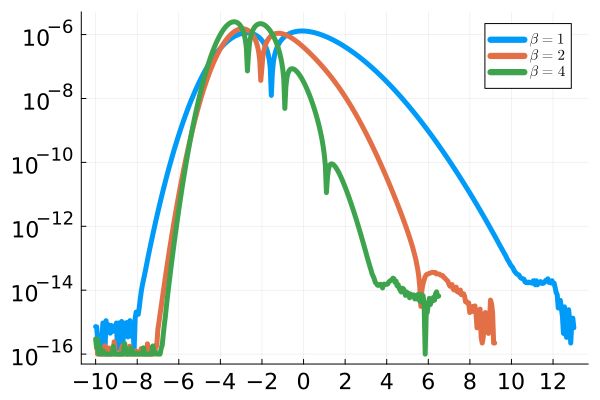

In [4]:
D1=(13/sqrt(1)):-0.05:-10;
D2=(13/sqrt(2)):-0.05:-10;
D4=6.5:-0.05:-10;
er_cdf=err_cdf(D1,D2,D4)

The following table shows the absolute errors for $x=0,\pm 2,\pm 4,\pm 6, \pm 8$, $\beta=1,2,4$.

In [5]:
X=-8:2:6;
err=zeros(length(X),3);
B=[1,2,4];
for i=1:length(B)
    global β=B[i]
    F_cdf=TW(β)
    for j=1:length(X)
        temp=X[j]
        if β==4
            err[j,3]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
        elseif β==1
            err[j,1]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
        elseif β==2
            err[j,2]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
        end
    end
end
err1=err[:,1];err2=err[:,2];err4=err[:,3];

In [6]:
Table(x=X,β1=err1,β2=err2,β4=err4)

Table with 4 columns and 8 rows:
     x   β1           β2           β4
   ┌──────────────────────────────────────────
 1 │ -8  1.83214e-15  1.96479e-17  1.05997e-16
 2 │ -6  7.27812e-10  9.6021e-12   3.30485e-12
 3 │ -4  3.71489e-7   3.60002e-7   1.00431e-6
 4 │ -2  6.55339e-7   1.02677e-7   2.16174e-6
 5 │ 0   1.29466e-6   4.01435e-7   3.31922e-8
 6 │ 2   4.11643e-7   1.13741e-8   1.68663e-11
 7 │ 4   3.35236e-8   3.28579e-11  1.52101e-14
 8 │ 6   9.57533e-10  3.27516e-14  3.77476e-15

Similarly, the following plot is for the PDF.

In [9]:
function err_pdf(D1,D2,D4)
    er_pdf=Plots.plot();
    beta=[1,2,4];
    err1=zeros(length(D1),1);
    err2=zeros(length(D2),1);
    err4=zeros(length(D4),1);
    for j=1:length(beta)
        global β=beta[j]
        F_pdf=TW(β;pdf=true,Δx_f=-0.001)
        if β==1
            for i=1:length(D1)
                temp=D1[i]
                err1[i]=abs(F_pdf(temp)-f1(temp))
            end
        elseif β==2
            for i=1:length(D2)
                temp=D2[i]
                err2[i]=abs(F_pdf(temp)-f2(temp))
            end
        elseif β==4
            for i=1:length(D4)
                temp=D4[i]
                err4[i]=abs(F_pdf(temp/(2^(1/6)))*(2^(-1/6))-f4(temp))
            end
        end
        for i=1:length(D1)
            if err1[i]<10^(-16)
                err1[i]=10^(-16)
            end
        end
        for i=1:length(D2)
            if err2[i]<10^(-16)
                err2[i]=10^(-16)
            end
        end
        for i=1:length(D4)
            if err4[i]<10^(-16)
                err4[i]=10^(-16)
            end
        end
        if β==1
            er_pdf=Plots.plot!(D1,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β==2
            er_pdf=Plots.plot!(D2,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β==4
            er_pdf=Plots.plot!(D4,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        end
    end
    return er_pdf
end

err_pdf (generic function with 1 method)

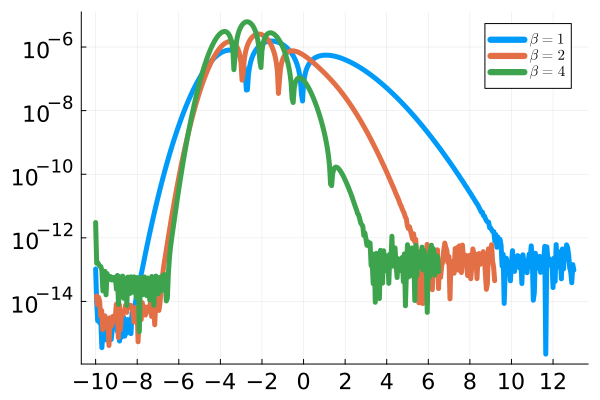

In [10]:
D1=(13/sqrt(1)):-0.05:-10;
D2=(13/sqrt(2)):-0.05:-10;
D4=6.5:-0.05:-10;
er_pdf=err_pdf(D1,D2,D4)

## Error plot with respect to $\left|\Delta x\right|$ and $M$

The following plots show how the absolute error (CDF) over the entire domain $x\in[-10,13/\sqrt{\beta}]$ changes when $\left|\Delta x\right|$ decreases and $M$ increases for a fixed $\beta$-value. $\Delta x=-0.004,-0.002,-0.001$ and $M=\lfloor -1/\Delta x\rfloor$ are used.

In [100]:
function err_cdfc(β,D)
    er_cdfc=Plots.plot();
    delta_x=[-0.004,-0.002,-0.001];
    for j=1:length(delta_x)
        err=zeros(length(D),1)
        dx=delta_x[j];
        F_cdf=TW(β;Δx_f=dx)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err[i]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
            elseif β==1
                err[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
            elseif β==2
                err[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
            end
        end
        for i=1:length(D)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.004$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        elseif j==2
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.002$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        elseif j==3
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.001$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        end
    end
    return er_cdfc
end

err_cdfc (generic function with 1 method)

For $\beta=1$, we have

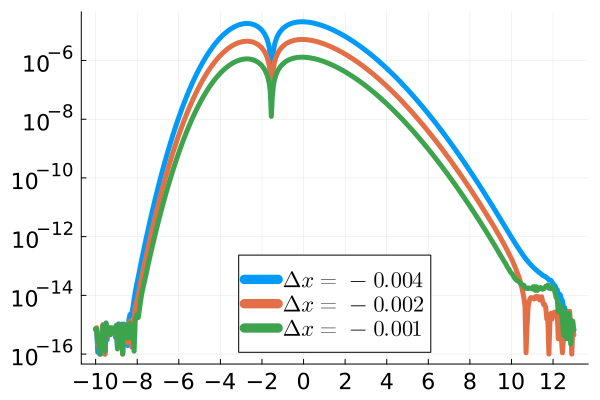

In [96]:
D=13:-0.05:-10;
er_cdfc=err_cdfc(1,D)

For $\beta=2$, we have

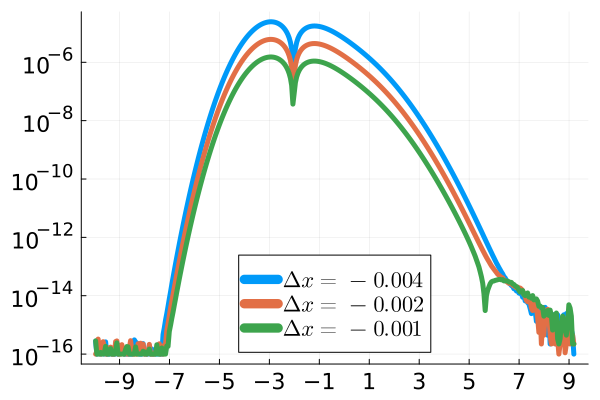

In [101]:
D=13/sqrt(2):-0.05:-10;
er_cdfc=err_cdfc(2,D)

For $\beta=4$, we have

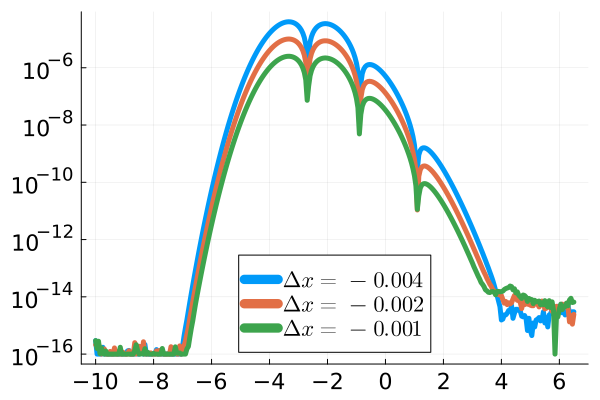

In [103]:
D=6.5:-0.05:-10;
er_cdfc=err_cdfc(4,D)

Similarly, the following plots are for the PDF.

In [105]:
function err_pdfc(β,D)
    er_pdfc=Plots.plot();
    delta_x=[-0.004,-0.002,-0.001];
    for j=1:length(delta_x)
        err=zeros(length(D),1)
        dx=delta_x[j];
        F_pdf=TW(β;pdf=true,Δx_f=dx)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err[i]=abs(F_pdf(temp/(2^(1/6)))*(2^(-1/6))-f4(temp))
            elseif β==1
                err[i]=abs(F_pdf(temp)-f1(temp))
            elseif β==2
                err[i]=abs(F_pdf(temp)-f2(temp))
            end
        end
        for i=1:length(D)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.004$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        elseif j==2
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.002$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        elseif j==3
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.001$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(D[end]):2:floor(D[1]),legend=:bottom)
        end
    end
    return er_pdfc
end

err_pdfc (generic function with 1 method)

For $\beta=1$, we have

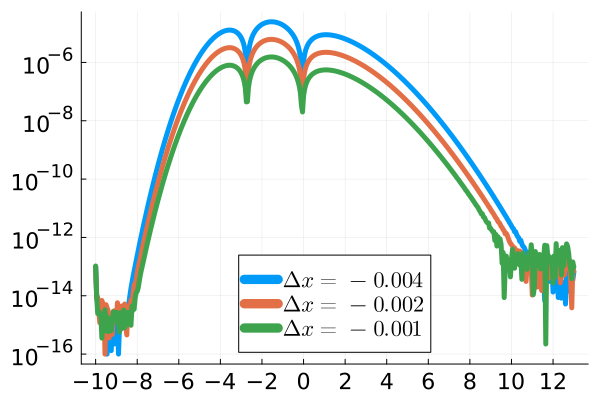

In [106]:
D=13:-0.05:-10;
er_pdfc=err_pdfc(1,D)

For $\beta=2$, we have

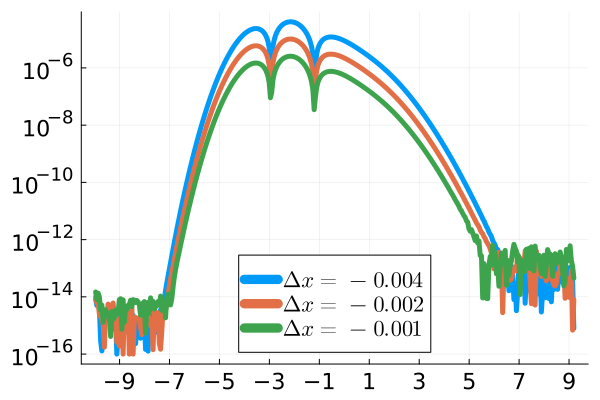

In [107]:
D=13/sqrt(2):-0.05:-10;
er_pdfc=err_pdfc(2,D)

For $\beta=4$, we have

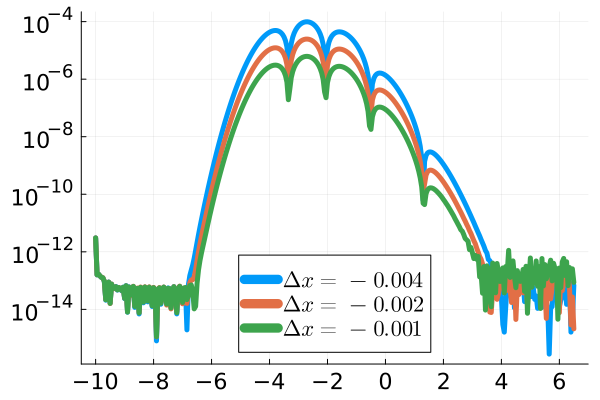

In [108]:
D=6.5:-0.05:-10;
er_pdfc=err_pdfc(4,D)

## Order of error plot

The following plot shows the order of error of the finite-difference discretization (CDF) using trapezoidal method for $\beta=2$, $x_{0}=13$, at $x=-2$ before interpolation with $M=100$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.005$ are used.

In [20]:
β=2;
xx=-2;
result_ref=TW(β;x0=13,interp=false,Δx_f=-0.001,M_f=100);
x_ref=result_ref[1];F_ref=result_ref[2];ind=findall(x -> x == xx, x_ref)[1];

In [39]:
del_x=[-0.02,-0.01,-0.005];
err=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;x0=13,interp=false,Δx_f=dx,M_f=100);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind2=findall(x -> x == xx, x_cdf)[1];
    err[i]=abs(F_cdf[ind2]-F_ref[ind]);
end

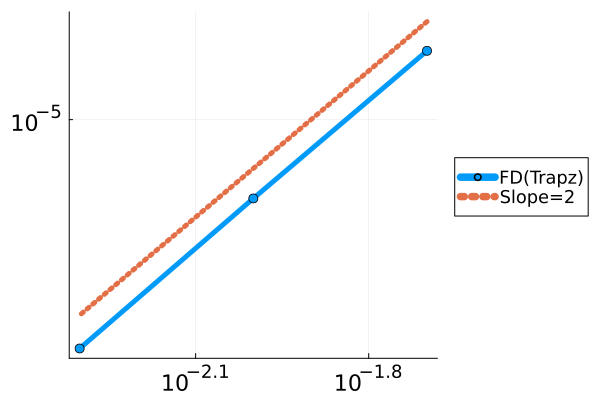

In [52]:
p=Plots.plot();
p=plot!(del_x.*(-1),vec(err),lw=5,label="FD(Trapz)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-1.2)*(del_x.*(-1)).^(2),lw=5,label="Slope=2",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the order of error of the finite-difference discretization (CDF) using BDF3 for $\beta=2$, $x_{0}=13$, at $x=-2$ before interpolation with $M=100$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.005$ are used.

In [29]:
β=2;
xx=-2;
result_ref3=TW(β;x0=13,step="bdf3",interp=false,Δx_f=-0.001,M_f=100);
x_ref3=result_ref3[1];F_ref3=result_ref3[2];ind3=findall(x -> x == xx, x_ref3)[1];

In [41]:
del_x=[-0.02,-0.01,-0.005];
err3=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf3=TW(β;x0=13,step="bdf3",interp=false,Δx_f=dx,M_f=100);
    x_cdf3=result_cdf3[1];F_cdf3=result_cdf3[2];
    ind32=findall(x -> x == xx, x_cdf3)[1];
    err3[i]=abs(F_cdf3[ind32]-F_ref3[ind3]);
end

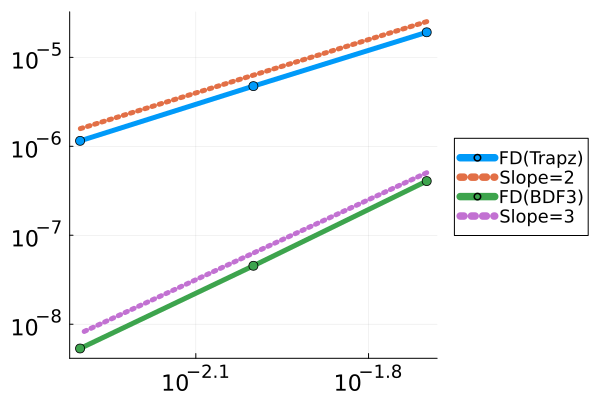

In [53]:
p=plot!(del_x.*(-1),vec(err3),lw=5,label="FD(BDF3)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-1.2)*(del_x.*(-1)).^(3),lw=5,label="Slope=3",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the order of error of the finite-difference discretization (CDF) using BDF4 for $\beta=2$, $x_{0}=13$, at $x=-2$ before interpolation with $M=100$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.005$ are used.

In [46]:
β=2;
xx=-2;
result_ref4=TW(β;x0=13,step="bdf4",interp=false,Δx_f=-0.001,M_f=100);
x_ref4=result_ref4[1];F_ref4=result_ref4[2];ind4=findall(x -> x == xx, x_ref4)[1];

In [47]:
del_x=[-0.02,-0.01,-0.005];
err4=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf4=TW(β;x0=13,step="bdf4",interp=false,Δx_f=dx,M_f=100);
    x_cdf4=result_cdf4[1];F_cdf4=result_cdf4[2];
    ind42=findall(x -> x == xx, x_cdf4)[1];
    err4[i]=abs(F_cdf4[ind42]-F_ref4[ind4]);
end

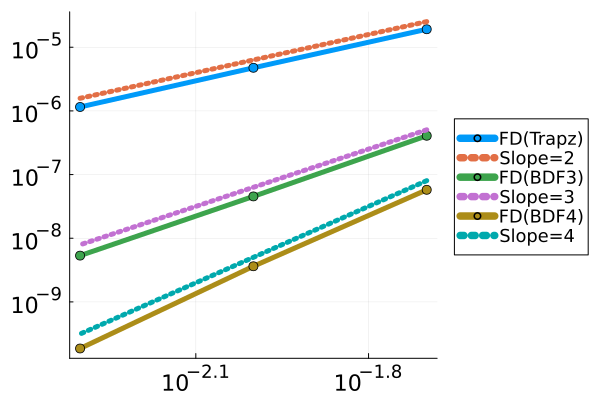

In [54]:
p=plot!(del_x.*(-1),vec(err4),lw=5,label="FD(BDF4)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-0.3)*(del_x.*(-1)).^(4),lw=5,label="Slope=4",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the order of error of the finite-difference discretization (CDF) using BDF5 for $\beta=2$, $x_{0}=13$, at $x=-2$ before interpolation with $M=40$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.075,-0.06,-0.05$ are used.

In [56]:
β=2;
xx=-2;
result_ref5=TW(β;x0=13,step="bdf5",interp=false,Δx_f=-0.001,M_f=40);
x_ref5=result_ref5[1];F_ref5=result_ref5[2];ind5=findall(x -> x == xx, x_ref5)[1];

In [81]:
del_x=[-0.06,-0.05,-0.04];
err5=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf5=TW(β;x0=13,step="bdf5",interp=false,Δx_f=dx,M_f=40);
    x_cdf5=result_cdf5[1];F_cdf5=result_cdf5[2];
    ind52=findall(x -> x == xx, x_cdf5)[1];
    err5[i]=abs(F_cdf5[ind52]-F_ref5[ind5]);
end

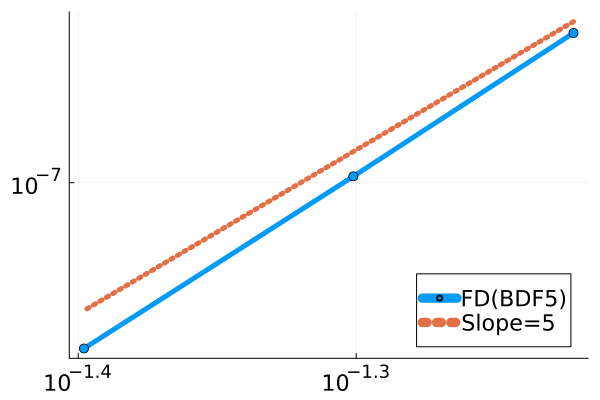

In [82]:
p=Plots.plot();
p=plot!(del_x.*(-1),vec(err5),lw=5,label="FD(BDF5)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(-0.4)*(del_x.*(-1)).^(5),lw=5,label="Slope=5",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:bottomright)

The following plot shows the order of error of the finite-difference discretization (CDF) using BDF6 for $\beta=2$, $x_{0}=13$, at $x=-2$ before interpolation with $M=40$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.075,-0.06,-0.05$ are used.

In [71]:
β=2;
xx=-2;
result_ref6=TW(β;x0=13,step="bdf6",interp=false,Δx_f=-0.001,M_f=40);
x_ref6=result_ref6[1];F_ref6=result_ref6[2];ind6=findall(x -> x == xx, x_ref6)[1];

In [84]:
del_x=[-0.075,-0.06,-0.05];
err6=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf6=TW(β;x0=13,step="bdf6",interp=false,Δx_f=dx,M_f=40);
    x_cdf6=result_cdf6[1];F_cdf6=result_cdf6[2];
    ind62=findall(x -> x == xx, x_cdf6)[1];
    err6[i]=abs(F_cdf6[ind62]-F_ref6[ind6]);
end

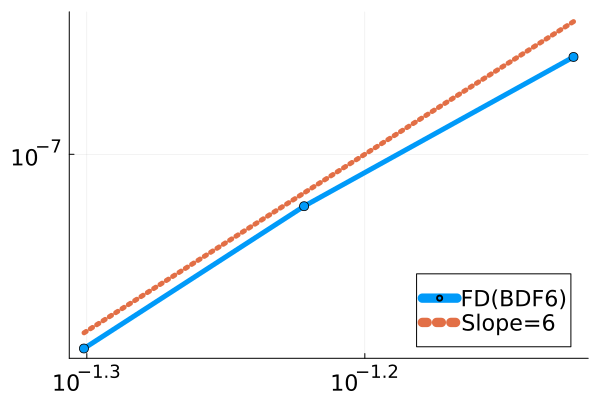

In [85]:
p=Plots,plot();
p=plot!(del_x.*(-1),vec(err6),lw=5,label="FD(BDF6)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(0.2)*(del_x.*(-1)).^(6),lw=5,label="Slope=6",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:bottomright)

## Error plot with respect to $x_{0}$

The following plot shows the absolute error (CDF) using trapezoidal method after interpolation over $x=-8,-7,\cdots,x_{0}$ with respect to $x_{0}$. $\beta=1,2,4$, $x_{0}=13,12,11,10,9,8,7,6,5,4,3,2$.

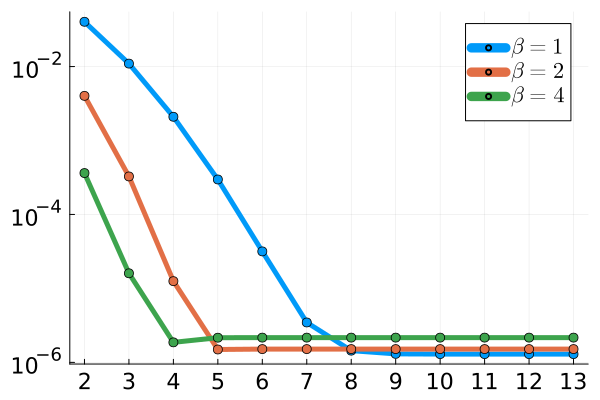

In [3]:
Beta=[1,2,4];
X=[13,12,11,10,9,8,7,6,5,4,3,2];
p=Plots.plot();
for i=1:length(Beta)
    global β=Beta[i];
    err=zeros(1,length(X));
    for j=1:length(X)
        x00=X[j];
        xx=-8:1:x00
        E=zeros(1,length(xx));
        F_cdf=TW(β;x0=x00);
        if β==4
            for k=1:length(xx)
                temp=xx[k]
                E[k]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=β,num_points=300));
            end
            err[j]=maximum(E);
        else
            for k=1:length(xx)
                temp=xx[k]
                E[k]=abs(F_cdf(temp)-cdf(TW2,temp;beta=β,num_points=300));
            end
            err[j]=maximum(E);
        end
    end
    if β==1
        p=plot!(X,vec(err),lw=5,label=L"$\beta=1$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==2
        p=plot!(X,vec(err),lw=5,label=L"$\beta=2$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==4
        p=plot!(X,vec(err),lw=5,label=L"$\beta=4$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    end
end
p